In [2]:
!pip3 install requests


[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from sklearn.preprocessing import StandardScaler

In [237]:
# Download  csv file
url_to_csv_file = "https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv"
save_with_filename = "D:/customer-segmentation-and-predictive-analysis/marketing_camp.csv"

reponse = requests.get(url_to_csv_file)

with open(save_with_filename, 'wb') as file:
    file.write(reponse.content)

print(f'csv file is saved at {save_with_filename}')


csv file is saved at D:/customer-segmentation-and-predictive-analysis/marketing_camp.csv


In [238]:
df = pd.read_csv("marketing_camp.csv", delimiter = ';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [239]:
df.loc[:, 'Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])

C:\Users\ganes\AppData\Local\Temp\ipykernel_27640\4261289699.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])


## EDA

In [240]:
df.shape

(2240, 29)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## What to do we Null/Missing Values?
Check the null values in different columns, if neccesary check the percentage of null values available per column. Based on that decide the stragies where to drop null values or should be fill the null/missing values with median, mode or mean. Note that the mean is more sensitive to the outliers, so median can be used to fill the missing values. If null values are less than 10% of the overall data size then we will use strategy to drop them direcly.

In [242]:
# check the null values
def plot_missing(dataframe):
    null_values = pd.DataFrame(dataframe.isnull().sum(),index = None)
    null_values.reset_index(inplace = True)

    # rename the columns
    null_values.columns = ['col_name', 'missing_count']
    condition = (null_values.iloc[:,1] != 0) 
    percent_missing = (null_values[condition]['missing_count'].sum() / dataframe.shape[0]) * 100
    print(f"The dataframe contain only {round(percent_missing,2)}% of missing values")
    
    plt.figure(figsize = ( 20,  6))
    plt.bar(null_values['col_name'], null_values['missing_count'])
    plt.xticks(rotation = 30)
    plt.xlabel("Column Names")
    plt.ylabel("Number of Missing Values")
    plt.title("Column vs Missing Values")
    plt.plot()

    return None



The dataframe contain only 1.07% of missing values


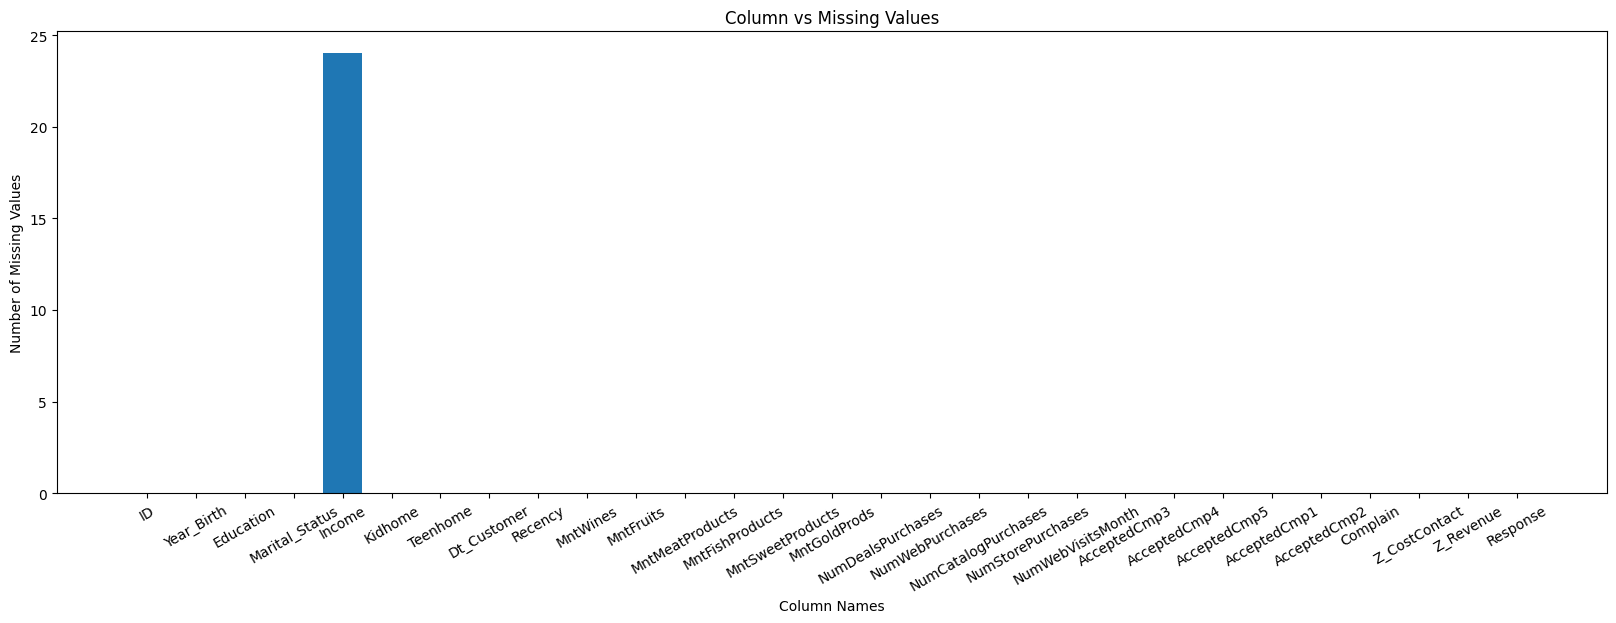

In [243]:
# call the function
plot_missing(df)

## Understand the bar plot
It shows only a income column has null values, we could have understand it easy from data frame but ploting the bar chart is always a best practice. So as only single column has missing values and statistically data conatin only 1% missing values so we will drop it directly.

In [244]:
# drop missing value (rows)
df = df.dropna(axis = 0)

C:\Users\ganes\AppData\Local\Temp\ipykernel_27640\1531109476.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


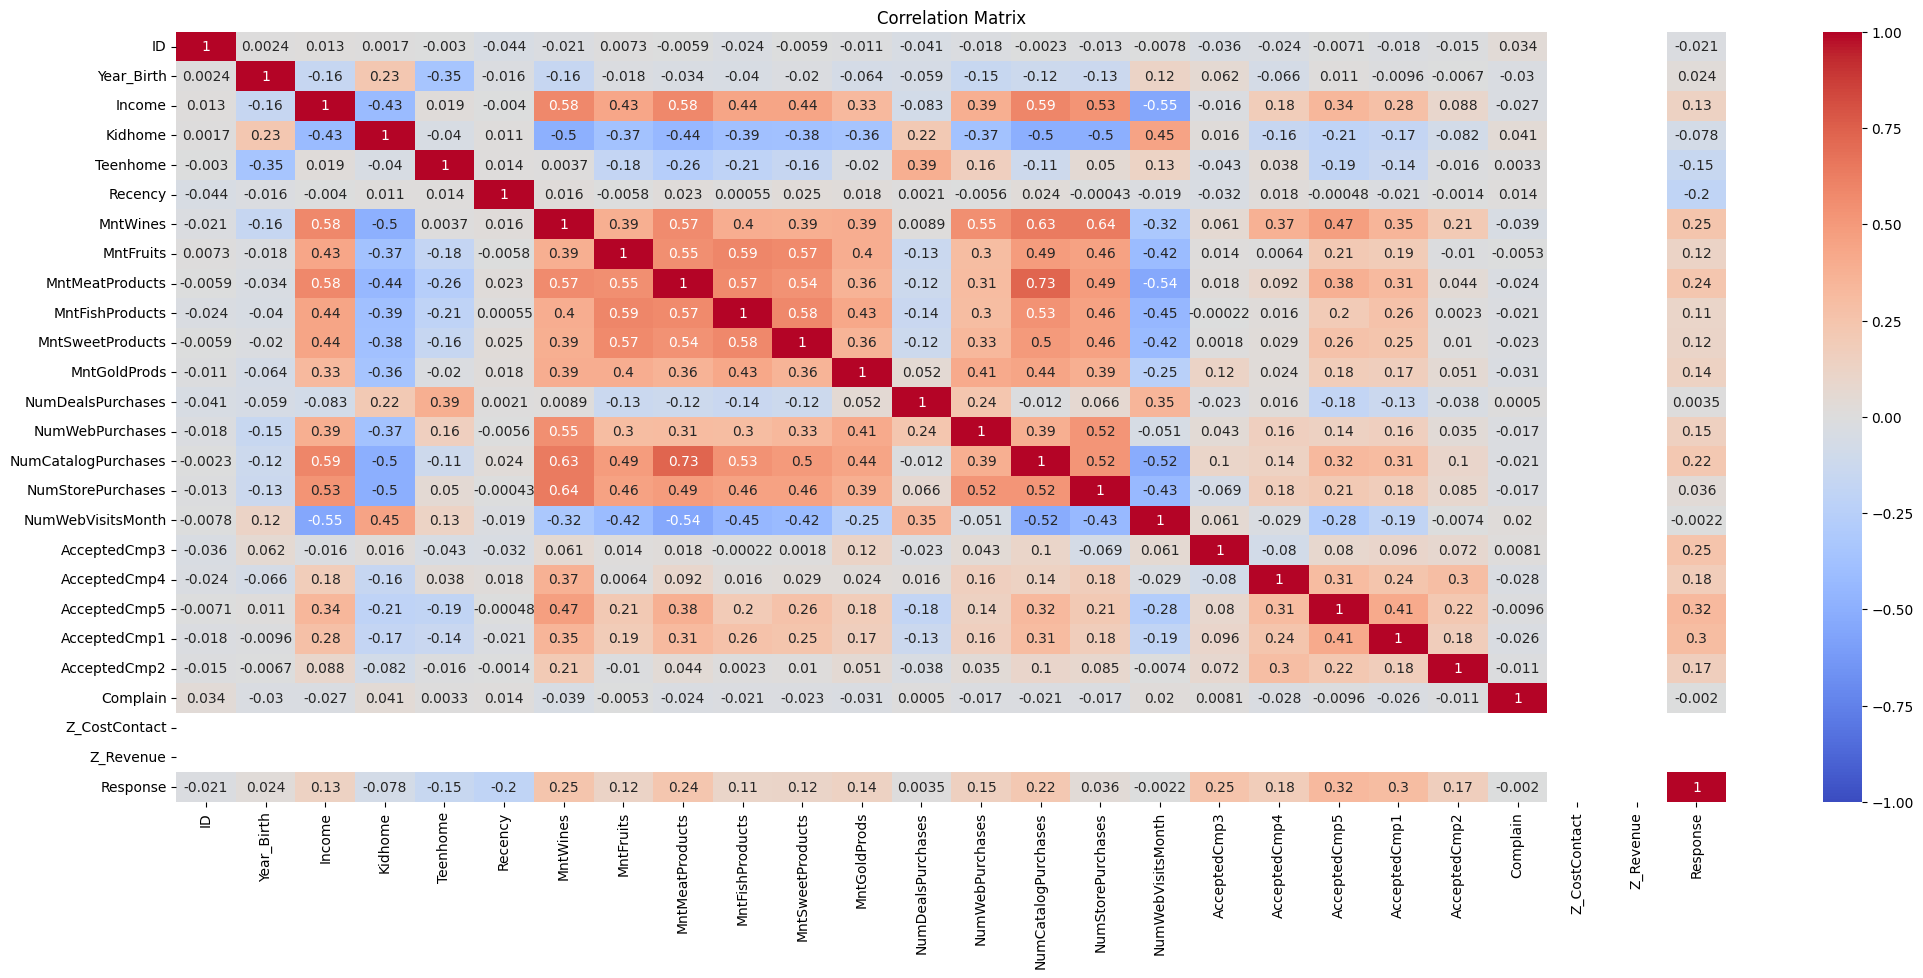

In [245]:
# let see how columns are correlated with eachother
corr_matrix = df.corr()
plt.figure(figsize=(25, 10))  # Optional: Set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## What does this correlation Matrix show?
By looking at correlation matrix we can have idea about the how different columns are correlated with each other or in other words how linear they are related. Red color show the correlation of column with itself, as the color become dull the correlation becomes weaker. The gray cells shows either very low value or negative values which show the weaker correlation between the columns. Light and Dark Blue cells shows the negative correlation between the columns.

One More find is that Z_CostContact and Z_Revenue has no correlation with other columns and with themselves as well. Which means we can easily drop them.

## Why correlation Matrix is important?
Now we have understood the meaning information about correlation between different columns. By simply looking at matrix we understood that whether we have to drop few columns or not, also we understood shall we perform the diamensional reduction or not. We have answers to this questions.

## Outcome
We can drop Z_CostContact and Z_Revenue columns.

We can perform PCA so that we can procced with only relevent information only.

# Let see how positive and negative correlation look like.

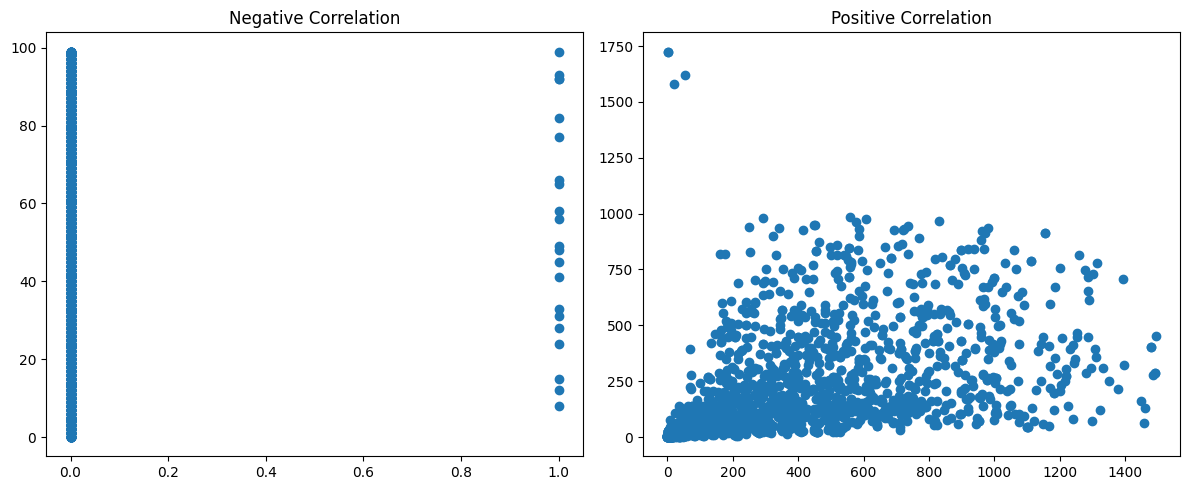

In [246]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df["Complain"], df["Recency"])
axes[0].set_title('Negative Correlation')
axes[1].scatter(df["MntWines"],df["MntMeatProducts"])
axes[1].set_title('Positive Correlation')
plt.tight_layout()
plt.show()

In [247]:
df = df.drop(['Z_CostContact' ,'Z_Revenue'], axis =1)

# Understand the data distribution


<AxesSubplot:>

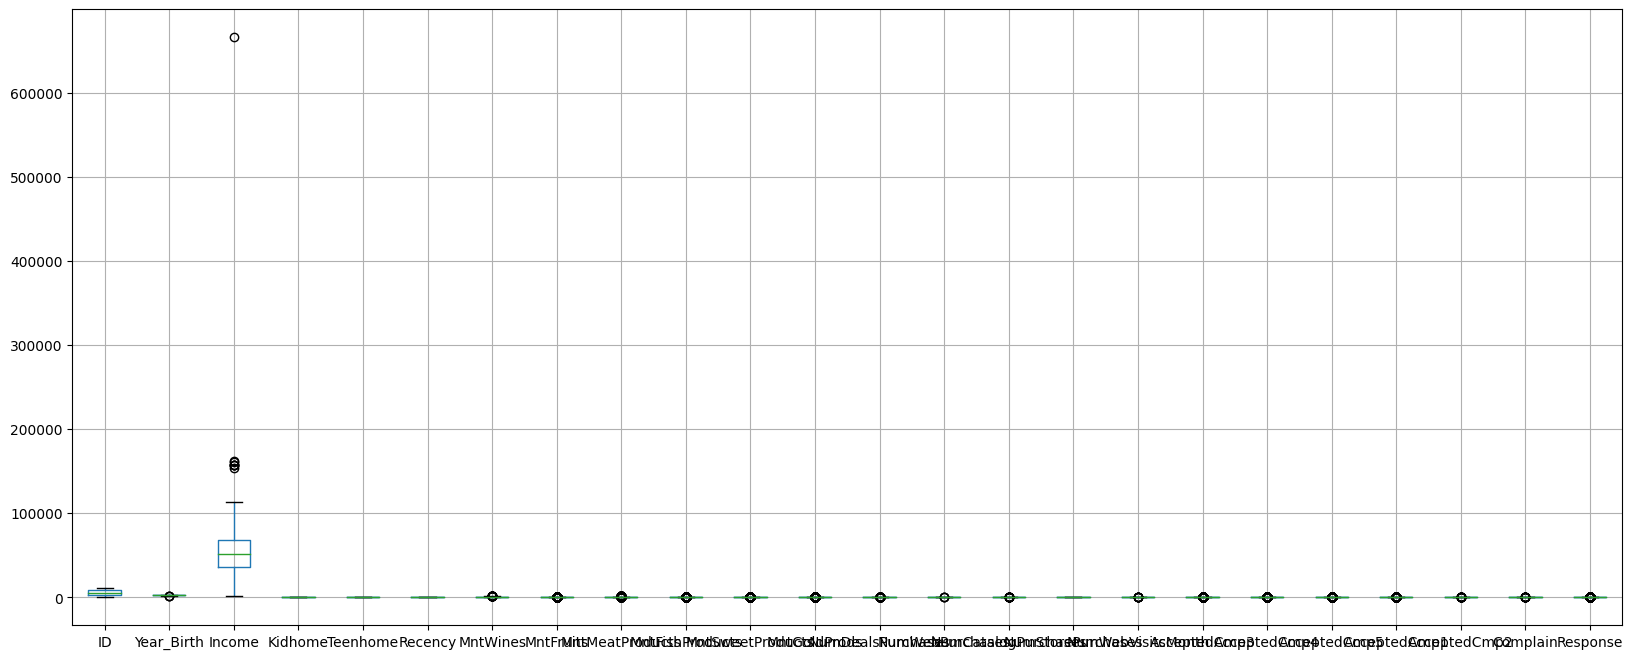

In [248]:
df.boxplot(figsize = (20,8))


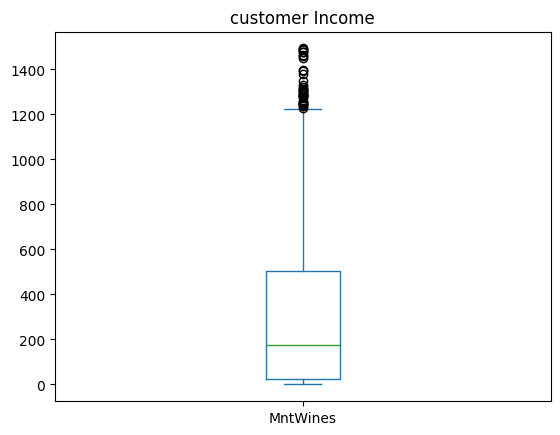

In [249]:
df["MntWines"].plot(kind = 'box', title = 'customer Income')
plt.show()

# What do we understand from this ?
There are outlier in the data, outlier are the data points above upper limit and below lower limit. Let remove them before processing further.

In [250]:
# let consider all the columns except Dt_customer
cols = list(df.columns)
rem = ['Dt_Customer', "Marital_Status", "Education"]
for i in rem:
    cols.remove(i)

# Count the outliers and plot them

In [251]:
outlier_count = {}
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count[col] = len(outliers)
outlier_count

{'ID': 0,
 'Year_Birth': 3,
 'Income': 8,
 'Kidhome': 0,
 'Teenhome': 0,
 'Recency': 0,
 'MntWines': 35,
 'MntFruits': 246,
 'MntMeatProducts': 174,
 'MntFishProducts': 222,
 'MntSweetProducts': 246,
 'MntGoldProds': 205,
 'NumDealsPurchases': 84,
 'NumWebPurchases': 3,
 'NumCatalogPurchases': 23,
 'NumStorePurchases': 0,
 'NumWebVisitsMonth': 8,
 'AcceptedCmp3': 163,
 'AcceptedCmp4': 164,
 'AcceptedCmp5': 162,
 'AcceptedCmp1': 142,
 'AcceptedCmp2': 30,
 'Complain': 21,
 'Response': 333}

[]

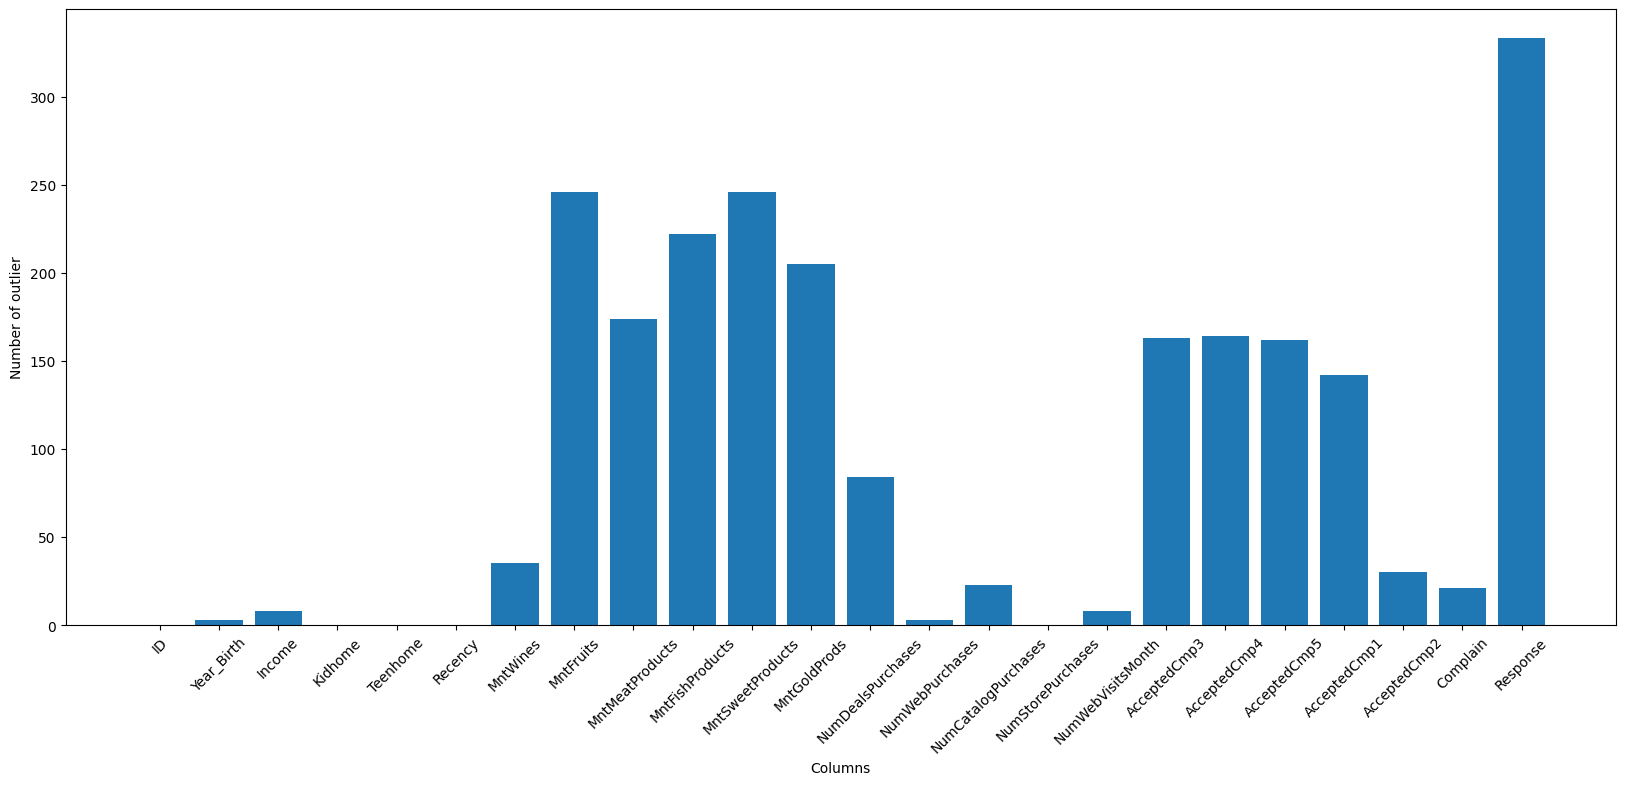

In [252]:
plt.figure(figsize=(20,8))
plt.bar(list(outlier_count.keys()),list(outlier_count.values()))
plt.xticks(rotation = 45)
plt.xlabel("Columns")
plt.ylabel("Number of outlier")
plt.plot()

        

# Label Encoding

In [253]:
marital_status_mapping = {
    "Married": "Couple",
    "Together": "Couple",
    "Single": "Single",
    "Divorced": "Single",
    "Widow": "Single",
    "Alone": "Single",
    "Absurd": "Single",
    "YOLO": "Single"
}

df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)

total_adults_mapping = {
    "Couple": 2,
    "Single": 1
}
df['Total_adults'] = df['Marital_Status'].map(total_adults_mapping)



df['Education'].replace('2n Cycle', 'Master', inplace=True)

label_map = {'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
df['Education_encode'] = df['Education'].map(label_map)

# Feature Engineering

In [254]:
# calculate customers age
df["Customer_Age"] = datetime.now().year - df['Year_Birth']

# every customer spend money on different things, how much will be total spend
df['Total_spend'] = df['MntWines'] + df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] +df['MntSweetProducts'] 

# Total purchase
df['Total_purchase'] = df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases']

# Total children
df['Total_chil'] = df['Kidhome'] + df['Teenhome']

df['accepted_camp'] = df['AcceptedCmp1'] +df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Complain'] + df['Response']

In [255]:
# Get the current year
current_year = datetime.now().year

# Extract the year from 'Dt_Customer' and subtract from the current year
df['Customer_Since_Years'] = current_year - pd.to_datetime(df['Dt_Customer']).dt.year

In [263]:
df['Family_size'] = df['Total_adults'] + df['Total_chil']

In [256]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [257]:
df.drop(columns=['ID', 'Year_Birth','Dt_Customer', 'Education', 'Marital_Status','Kidhome',
       'Teenhome'],axis=1, inplace=True ) 

In [258]:
df.shape

(2216, 28)

## PCA

In [265]:
# filtering df for pca to check variance ratio
df_filtered = df[['Income', 'Customer_Age', 'Total_spend',
                  'Total_purchase', 'Total_chil', 'accepted_camp', 'Total_adults',
                  'Family_size', 'Customer_Since_Years', 'Education_encode']]

In [266]:
# normalization of data

scaler = StandardScaler()

# Standardize the df features 
df_scaled = scaler.fit_transform(df)

# standardize the df_filtered features 
df_filtered_scaled = scaler.fit_transform(df_filtered)